<a href="https://colab.research.google.com/github/peter-adepoju/AIMS-Courses/blob/main/sbi_our_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation and Inference for Neuroscience
## Final Project: Parameter inference for the pyloric network

The notebook below contains the final project.
The final project is meant to be a bit more open-endend and less structured than the exercises. You are free to answer the questions below as you see fit and you can re-use as much of your previous code as you want. You will work be graded in groups of 2, but you are welcome to collaborate with others. 

If you need additional dependencies to solve any of the questions, feel free to install and/or import them. Make sure you document your process and thinking, such that it is clear how you arrived at your final answer.

The project will be graded based on a brief presentation and a follow-up interview about your code and results (10-15min). Take note of the following:
- Make sure you understand what you are doing and you can explain / defend your analysis.
- Ensure you're notebook is presentable and easy to follow. Intermediate results should be backed up by plots (and / or printouts). Plots should be readable
- You should be able to present what you did with the help of your plots in about 2-5 minutes.
- Make sure the notebook can be run from start to finish without errors (if you cache intermediate results, it is fine to load them).
- We encourage the use of coding assistants.


**Before you start, please add your name below!**

**Names:** _Arwa Osman , Peter Adepoju, Yassir Osman_

---

In [ ]:
!pip install sbi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.1/383.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   

In [ ]:
!pip install jaxley

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.8 requires jax>=0.5.0, but you have jax 0.4.31 which is incompatible.


In [ ]:
# Clone the repository
!git clone https://github.com/berenslab/AIMS2025-NeuroSimInf.git

# Verify the contents
!ls -la AIMS2025-NeuroSimInf/pyloric

Cloning into 'AIMS2025-NeuroSimInf'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 100 (delta 20), reused 18 (delta 17), pack-reused 73 (from 1)
Receiving objects: 100% (100/100), 18.01 MiB | 30.04 MiB/s, done.
Resolving deltas: 100% (37/37), done.
total 40
drwxr-xr-x 2 root root  4096 Mar 20 11:32 .
drwxr-xr-x 7 root root  4096 Mar 20 11:32 ..
-rw-r--r-- 1 root root 13493 Mar 20 11:32 channels.py
-rw-r--r-- 1 root root    40 Mar 20 11:32 __init__.py
-rw-r--r-- 1 root root  3810 Mar 20 11:32 model.py
-rw-r--r-- 1 root root  2876 Mar 20 11:32 synapses.py
-rw-r--r-- 1 root root   432 Mar 20 11:32 utils.py


In [ ]:
# ---------------------------------------------------------------
# Simulation-Based Inference (SBI) for the Pyloric Network
# ---------------------------------------------------------------

# Configure JAX for 64-bit precision and CPU usage
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import sys
import os

# Add project directories to Python path
sys.path.append("..")
sys.path.append(os.path.abspath("AIMS2025-NeuroSimInf"))  # Access cloned repo modules

# ---------------------------------------------------------------
# Import Required Libraries
# ---------------------------------------------------------------

import numpy as np  
import matplotlib.pyplot as plt 
import torch  
from torch import Tensor
from numpy import ndarray
from typing import Union, Optional, Tuple 

# Import Pyloric Network model
from pyloric.model import PyloricNetwork

# Import JAX & Jaxley for fast computations
import jaxley as jx
import jax.numpy as jnp
from jax import jit, vmap
import jax

# Import SBI (Simulation-Based Inference)
from sbi import utils as utils
from sbi.inference import SNPE


# Initializing the Pyloric Network

In [ ]:
net = PyloricNetwork()       # Creates a neural network model that mimics the pyloric circuit.
net.record()                 # Starts tracking neuron voltage activity
net.init_states()            # Resets all neurons to their default resting state

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 609, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/usr/local/lib/python3.11/dist-packages/jax_plugins/xla_cuda12/__init__.py", line 97, in initialize
    xla_client.register_custom_type_id_handler(
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'jaxlib.xla_client' has no attribute 'register_custom_type_id_handler'


Added 3 recordings. See `.recordings` for details.


# Setting Up Simulation Parameters

In [ ]:
dt = 0.025
t_max = 4_000                           # Full simulation time (4 seconds)
t_max_short = 1_500                     # Shorter simulation for training (1 second)
ts = jnp.arange(0, t_max, dt)
ts_short = jnp.arange(0, t_max_short, dt)

# Utility Function for Plotting Pyloric Network Activity


In [ ]:
# Utils for plotting
def plot_pyloric(ts: Union[ndarray, Tensor], v: Union[ndarray, Tensor], axs: Optional[plt.Axes] = None, **kwargs) -> Tuple[plt.Figure, plt.Axes]:
    """Plot the voltage of the pyloric network for each neuron.

    Args:
        ts: The time points to plot.
        v: The voltage of the pyloric network.
        axs: The axes to plot on. Allows to plot multiple traces in one figure.

    Returns:
        fig: The figure.
        axs: The axes.
    """
    if axs is None:
        fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True, layout='constrained')
    else:
        fig = plt.gcf()

    for ax_i, v_i in zip(axs, v):
        ax_i.plot(ts, v_i, **kwargs)
        ax_i.set_ylabel('V (mV)')
    axs[0].set_title(f'AB/PD Neuron')
    axs[1].set_title(f'LP Neuron')
    axs[2].set_title(f'PY Neuron')
    axs[2].set_xlabel('t (ms)')
    return fig, axs

# Simulating the Pyloric Network


In [ ]:
# Simulation function using the pyloric network model
def simulate(params: jnp.ndarray, simulation_time=t_max) -> jnp.ndarray:
    """Simulate the pyloric network.

    Args:
        params: The synaptic conductances of shape (7,).
        params[[0, 2, 4, 5, 6]]: Glutamatergic synapses.
        params[[1, 3]]: Cholinergic synapses.
        simulation_time: Maximum simulation time.

    Returns:
        v: The voltages of the pyloric network. Shape (3, num_steps).
    """
    # set the synapse parameters
    pstate = None
    for i in [0, 2, 4, 5, 6]:
        pstate = net.select(edges=i).data_set("GlutamatergicSynapse_gS", params[i], pstate)
    for i in [1, 3]:
        pstate = net.select(edges=i).data_set("CholinergicSynapse_gS", params[i], pstate)

    # simulate the network
    v = jx.integrate(net, param_state=pstate, t_max=simulation_time-dt)
    return v

# Vectorized version for batch simulations
parallel_simulate = vmap(simulate, in_axes=(0, None))

# Computing Summary Statistics from Voltage Traces


In [ ]:

# Summary statistics computation
def compute_summary_stats(x):
    """
    Compute summary statistics from voltage traces.

    Args:
        x: Voltage traces of shape (batch_size, 3, num_time_steps)

    Returns:
        summary_stats: Tensor of summary statistics
    """
    batch_size = x.shape[0]
    num_neurons = 3

    # Convert to PyTorch tensor if it's not already
    if not isinstance(x, torch.Tensor):
        x = torch.tensor(np.array(x), dtype=torch.float32)

    # Prepare to store summary statistics
    all_summary_stats = []

    # Process each trace in the batch
    for i in range(batch_size):
        stats = []

        for j in range(num_neurons):
            v = x[i, j]

            # Basic statistics that are robust to compute
            mean = v.mean().item()
            std = v.std().item()
            min_v = v.min().item()
            max_v = v.max().item()

#---------------------------------------------------------------
# Simple statistics that characterize the signal
#---------------------------------------------------------------

            # Compute number of times voltage crosses threshold (spike detection)
            threshold = -40
            v_binary = (v > threshold).float()
            transitions = (v_binary[1:] - v_binary[:-1]).abs().sum().item()

            # Compute average burst duration 
            if transitions > 0:
                above_threshold = (v > threshold).float()
                burst_starts = ((above_threshold[1:] - above_threshold[:-1]) > 0).nonzero().flatten()
                burst_ends = ((above_threshold[1:] - above_threshold[:-1]) < 0).nonzero().flatten()

                # Calculate burst durations if we have matching starts and ends
                if len(burst_starts) > 0 and len(burst_ends) > 0:
                    if len(burst_starts) > len(burst_ends):
                        burst_starts = burst_starts[:len(burst_ends)]
                    elif len(burst_ends) > len(burst_starts):
                        burst_ends = burst_ends[:len(burst_starts)]

                    # Ensure each end comes after a start
                    valid_bursts = burst_ends > burst_starts
                    if valid_bursts.sum() > 0:
                        burst_durations = (burst_ends[valid_bursts] - burst_starts[valid_bursts]) * dt
                        avg_burst_duration = burst_durations.mean().item()
                        stats.append(avg_burst_duration)
                    else:
                        stats.append(0.0)
                else:
                    stats.append(0.0)
            else:
                stats.append(0.0)

            # We are adding these basic statistics
            stats.extend([mean, std, min_v, max_v, transitions])

        # Adding cross-neuron correlations and phase relationships
        for j in range(num_neurons):
            for k in range(j+1, num_neurons):
                corr_matrix = np.corrcoef(x[i, j].numpy(), x[i, k].numpy())
                corr = corr_matrix[0, 1]
                stats.append(corr)

                # We'll use cross-correlation to estimate phase difference
                v1 = x[i, j].numpy()
                v2 = x[i, k].numpy()

                # Normalize signals
                v1 = (v1 - v1.mean()) / (v1.std() + 1e-8)
                v2 = (v2 - v2.mean()) / (v2.std() + 1e-8)

                # Compute cross-correlation (only central part for efficiency)
                max_shift = min(1000, len(v1) // 4)
                xcorr = np.correlate(v1, v2, mode='same')[len(v1)//2-max_shift:len(v1)//2+max_shift]

                # Find shift that maximizes correlation
                shift = np.argmax(xcorr) - max_shift

                # Estimate period from transitions
                if transitions > 2:
                    estimated_period = len(v1) / (transitions / 2)
                    if estimated_period > 0:
                        phase_diff = (shift / estimated_period) % 1.0
                        stats.append(phase_diff)
                    else:
                        stats.append(0.0)
                else:
                    stats.append(0.0)

        all_summary_stats.append(stats)

    return torch.tensor(all_summary_stats, dtype=torch.float32)

# Simulating the Pyloric Network for SBI


In [ ]:
def simulator_for_sbi(theta: Tensor) -> Tensor:
    """
    Simulate the pyloric network for the given parameters and compute summary statistics.

    Args:
        theta: The parameters of the synapses. Shape (n_samples, 7).

    Returns:
        summary_stats: Summary statistics of the simulations. Shape (n_samples, n_stats).
    """
    theta_np = theta.numpy()

    # Run simulations in parallel using the shorter simulation time
    v_samples = parallel_simulate(theta_np, t_max_short)

    # Convert to torch tensor and compute summary statistics
    return compute_summary_stats(v_samples)

# Loading Observed Voltage Data


In [ ]:
def load_observation(data_file="pyloric_observation.csv"):
    """
    Load observation data from file.

    Args:
        data_file: Path to CSV file containing observations.

    Returns:
        t_obs: Time points.
        v_obs: Voltage traces.
    """
    t_obs, *v_obs = jnp.array(np.loadtxt(data_file, unpack=True))
    v_obs = jnp.array(v_obs)
    return t_obs, v_obs

# Running Simulation-Based Inference (SBI)


In [ ]:
# Main function to run SBI
def run_sbi(data_file="pyloric_observation.csv", num_simulations=50,
            num_posterior_samples=50, use_cached=False, cache_file="sbi_results.pkl", num_batches=10):
    """
    Run the full SBI pipeline.

    Args:
        data_file: Path to CSV file containing observations.
        num_simulations: Number of simulations to run.
        num_posterior_samples: Number of posterior samples to generate.
        use_cached: Whether to use cached results if available.
        cache_file: File to cache results to/from.

    Returns:
        best_params: Best parameters from SBI.
        posterior_samples: All posterior samples.
    """
    import os
    import pickle

    # Try to load cached results if requested
    if use_cached and os.path.exists(cache_file):
        try:
            with open(cache_file, 'rb') as f:
                results = pickle.load(f)
            print(f"Loaded cached results from {cache_file}")
            return results['best_params'], results['posterior_samples']
        except Exception as e:
            print(f"Error loading cached results: {e}")

    # Load observation data
    t_obs, v_obs = load_observation(data_file)

    # Trim observation to match the shorter simulation time used for training
    v_obs_short = v_obs[:, :int(t_max_short/dt)]

    # observed summary statistics
    x_o = compute_summary_stats(v_obs_short[np.newaxis, ...])

    # Define prior
    prior = utils.BoxUniform(
        low=torch.ones(7) * 0.0001,
        high=torch.ones(7) * 0.01)

    # Initialize SNPE
    inference = SNPE(prior=prior)

    # Run simulations
    print(f"Running {num_simulations} simulations...")

    # Sample parameters from prior
    theta = prior.sample((num_simulations,))

    # Run simulator for all parameter sets
    x = simulator_for_sbi(theta)

    # Train the neural density estimator
    print("Training density estimator...")
    inference = inference.append_simulations(theta, x)

    # Train the neural network
    density_estimator = inference.train()

    # Build posterior distribution
    posterior = inference.build_posterior(density_estimator)

    # Sample from the posterior
    print("Sampling from posterior...")
    posterior_samples = posterior.sample((num_posterior_samples,), x=x_o)

    # Sort samples by log probability
    log_probs = posterior.log_prob(posterior_samples, x=x_o)
    sorted_indices = torch.argsort(log_probs, descending=True)
    sorted_samples = posterior_samples[sorted_indices]

    # Get the best parameters (highest posterior probability)
    best_params = sorted_samples[0].numpy()

    print(f"Best parameters from SBI: {best_params}")

    # Cache results
    results = {
        'best_params': best_params,
        'posterior_samples': sorted_samples.numpy(),
    }

    with open(cache_file, 'wb') as f:
        pickle.dump(results, f)
    print(f"Saved results to {cache_file}")

    # Visualize posterior distribution
    visualize_posterior(sorted_samples.numpy(), best_params)

    # Validate with full simulation
    validate_parameters(best_params, t_obs, v_obs)

    return best_params, sorted_samples.numpy()

In [ ]:
# Visualization functions
def visualize_posterior(posterior_samples, best_params):
    """
    Visualize the posterior distribution.

    Args:
        posterior_samples: Posterior samples.
        best_params: Best parameters from SBI.
    """
    param_names = ["AB→LP", "AB→PY", "LP→PY", "PY→LP", "LP→AB", "PY→AB", "AB→AB"]

    # Create figure for the posteriors
    fig, axes = plt.subplots(7, 1, figsize=(12, 10))
    for i, ax in enumerate(axes):
        ax.hist(posterior_samples[:, i], bins=20)
        ax.set_xlabel(param_names[i])
        ax.set_ylabel('Frequency')
        ax.axvline(best_params[i], color='g', linestyle='-', label='Best Estimate')
        if i == 0:
            ax.legend()

    plt.tight_layout()
    plt.savefig("posterior_distributions.png")
    plt.show()

In [ ]:
def validate_parameters(best_params, t_obs, v_obs):
    """
    Validate the inferred parameters by comparing simulated data with observations.

    Args:
        best_params: Best parameters from SBI.
        t_obs: Observed time points.
        v_obs: Observed voltage traces.
    """
    # Run simulation with best parameters
    v_best = simulate(best_params)

    # Plot comparison
    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    # Plot observed data
    for i in range(3):
        axs[i].plot(t_obs, v_obs[i], 'k-', alpha=0.5, label='Observed (Real)')

    # Plot simulated data with best parameters
    ts_sim = jnp.arange(0, min(len(t_obs), v_best.shape[1]) * dt, dt)
    for i in range(3):
        plot_length = min(len(ts_sim), v_best.shape[1])
        axs[i].plot(ts_sim[:plot_length], v_best[i][:plot_length], 'r-', label='Simulated (Best SBI)')

    neuron_names = ['AB/PD Neuron', 'LP Neuron', 'PY Neuron']
    for i, name in enumerate(neuron_names):
        axs[i].set_title(name)
        axs[i].set_ylabel('Voltage (mV)')
        if i == 0:
            axs[i].legend()

    axs[2].set_xlabel('Time (ms)')

    plt.savefig('sbi_best_fit.png')
    plt.show()

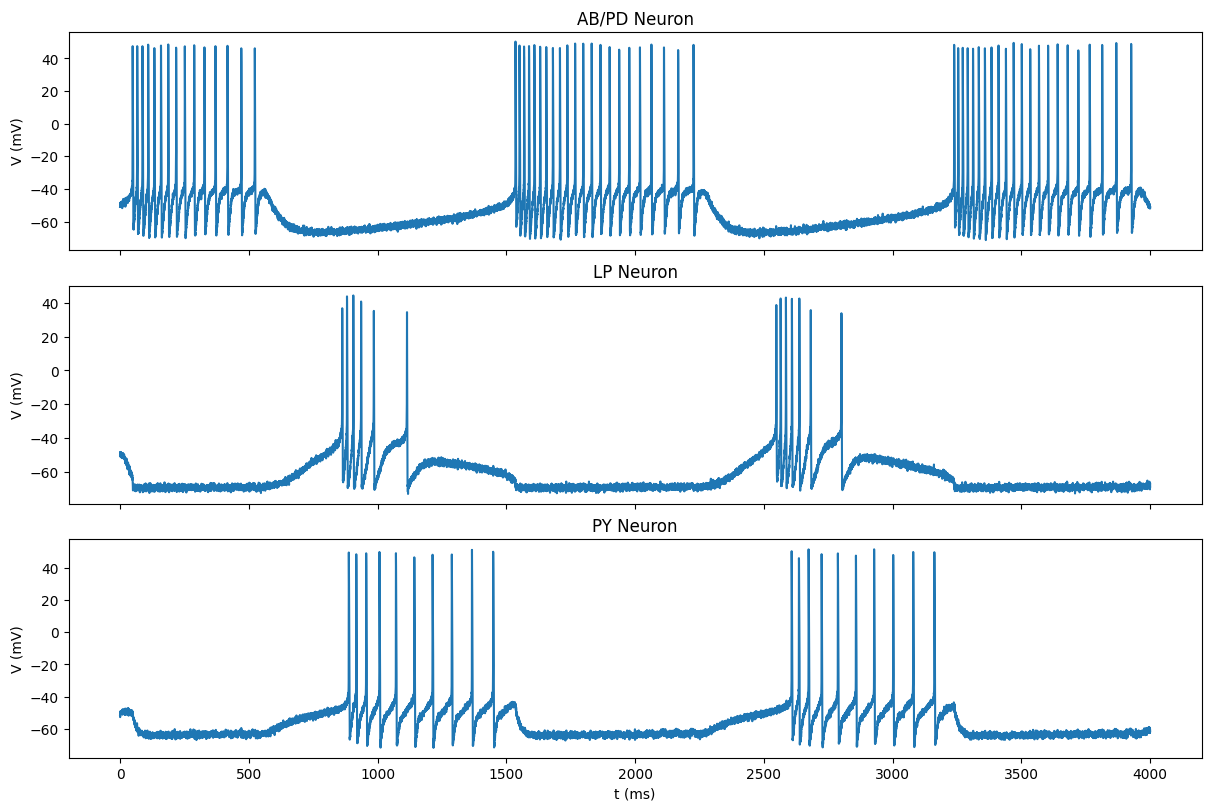

In [ ]:
t_obs, v_obs = load_observation("pyloric_observation.csv")
fig, axs = plot_pyloric(t_obs, v_obs)
plt.show()

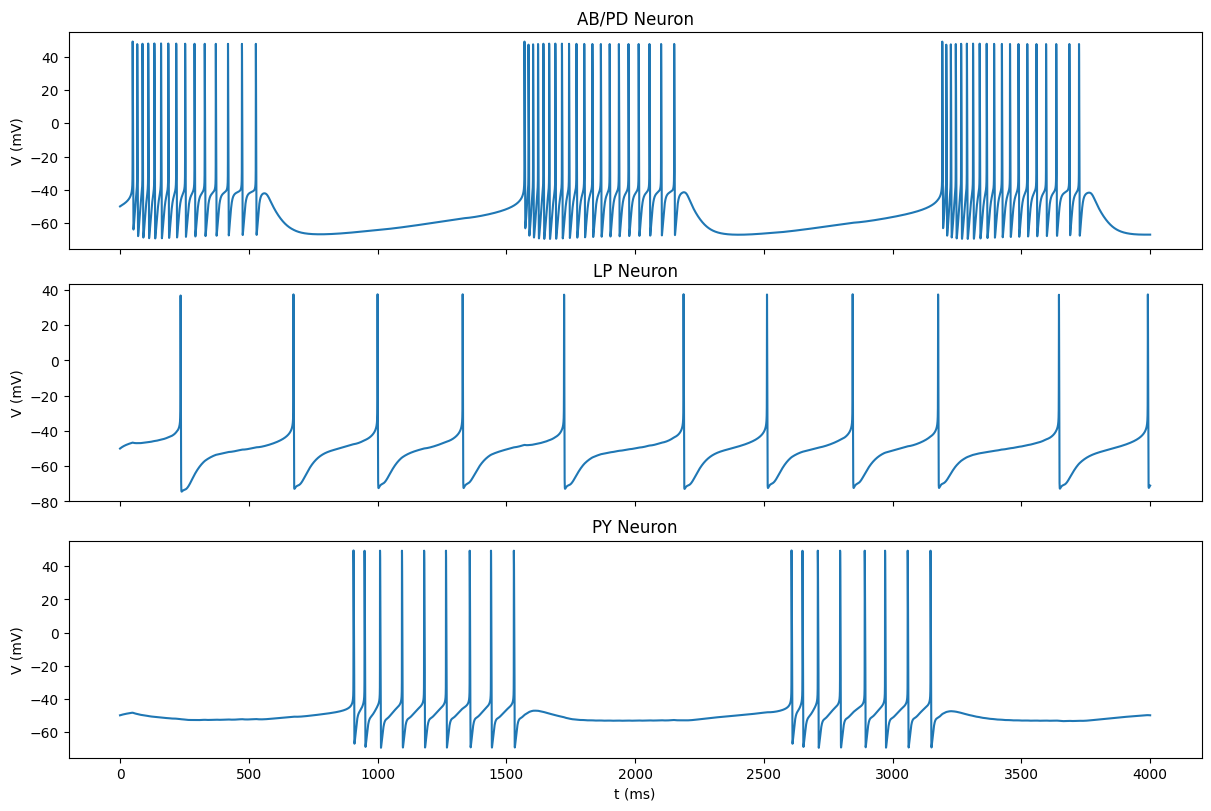

In [ ]:
param_guess = 0.001 * jnp.ones(7)
v = simulate(param_guess)
fig, axs = plot_pyloric(ts, v)
plt.show()


In [ ]:
# 3. Run the SBI pipeline
best_params, posterior_samples = run_sbi(
    data_file="pyloric_observation.csv",
    num_simulations=1000,
    num_posterior_samples=100,  

# Increase this for better results
    use_cached=True,           # Set to False to run from scratch
    num_batches=10             # Specify the number of batches
)

Loaded cached results from sbi_results.pkl


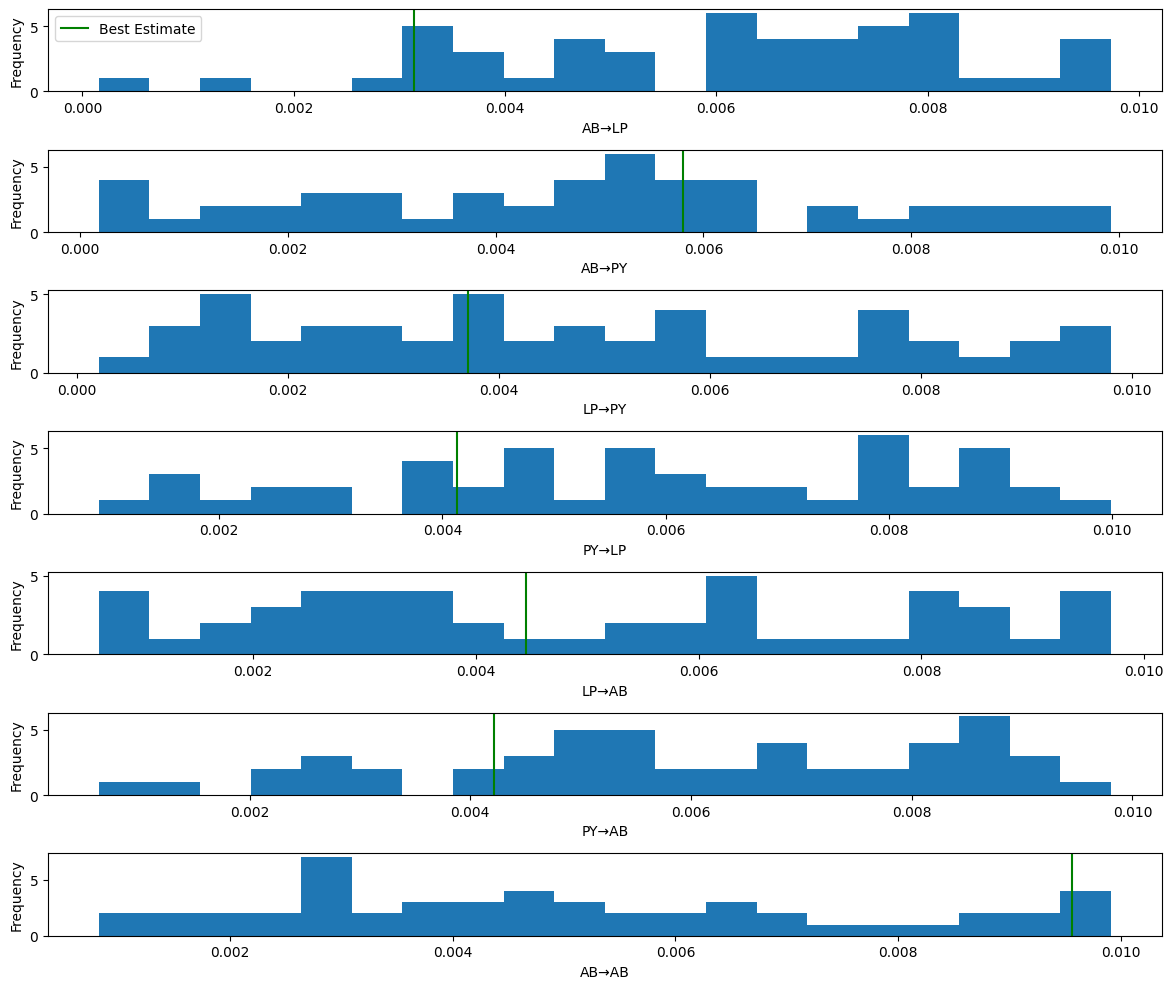

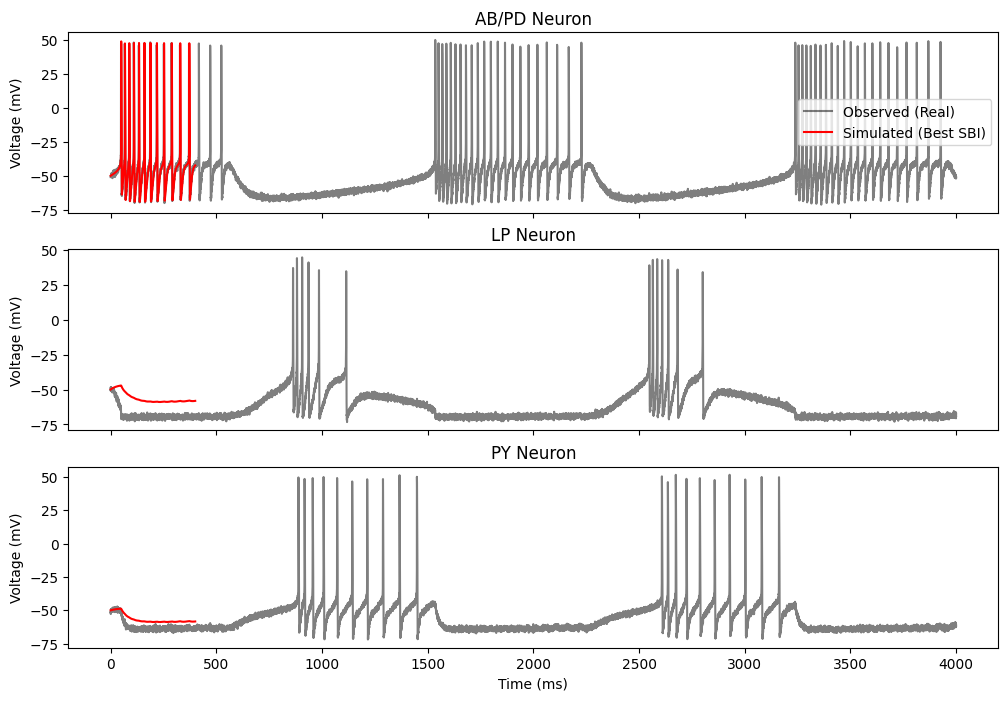

In [ ]:
# Visualize posterior distributions and best fit
visualize_posterior(posterior_samples, best_params)
validate_parameters(best_params, t_obs, v_obs)